# Problema

Andrés Camilo Ocampo Castillo - 20222578098
Gerónimo Alarcón García - 20221578073

La ecuación que seleccionamos, f(x) = 5x^3 + 100x − 50 = 0, surge de un problema de diseño de un resorte helicoidal con una pequeña no linealidad en su comportamiento, es decir, de la ley de Hooke, pero insertando valores que hacen el ejercicio más complejo: la fuerza ejercida por este resorte al ser desplazado una distancia x desde su posición de equilibrio está modelada por la ecuación F(x) = k1 * x + k2 * x^3, donde k1 = 100 N/m es la constante lineal del resorte y k2 = 5 N/m^3 es el coeficiente que introduce la no linealidad

El problema específico que buscamos resolver es: encontrar el desplazamiento (x) necesario para que el resorte ejerza una fuerza objetivo de F_objetivo = 50 N. Al igualar la fuerza modelada a la fuerza objetivo y reorganizar la ecuación, obtenemos la función f(x) = 5x^3 + 100x − 50, donde la raíz representa el desplazamiento que produce la fuerza deseada

La función en particular tiene 3 raices, pero unicamente una de estas es real, situada específicamente en 0,4939.

## Grafica



Matplotlib is building the font cache; this may take a moment.


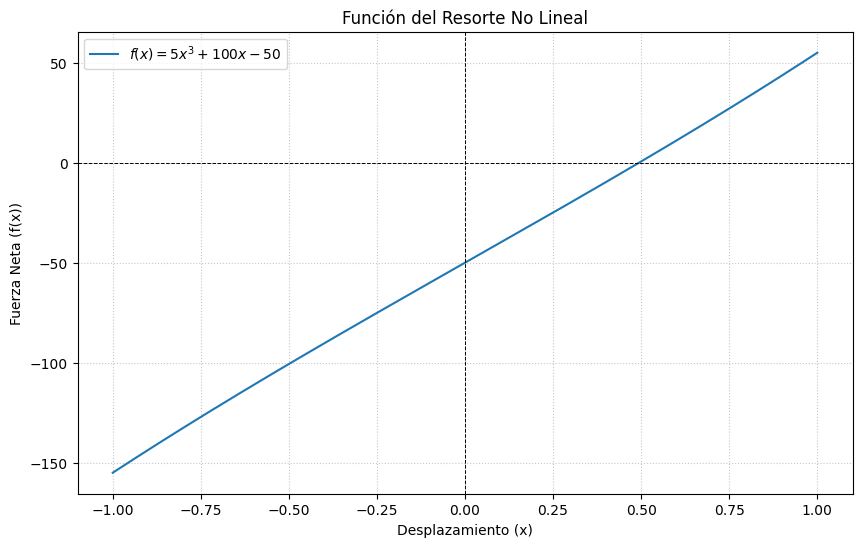

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función del resorte
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

# Creamos un rango de valores para x
x = np.linspace(-1, 1, 400)
y = f_resorte(x)

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = 5x^3 + 100x - 50$')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) # Línea del eje x en y=0
plt.axvline(0, color='black', linestyle='--', linewidth=0.7) # Línea del eje y en x=0
plt.xlabel('Desplazamiento (x)')
plt.ylabel('Fuerza Neta (f(x))')
plt.title('Función del Resorte No Lineal')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

## Métodos

### Bisección

In [35]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

# c = (b + a)/2 Tomará valores dependiendo de a y b
# fa Tomará valores dependiendo del a
# fb Tomará valores dependiendo del b
# fc Tomará valores dependiendo del c
# Error calculado según el valor absoluto de ((c actual - c reciente)/c reciente) * 100

def biseccion_resorte(func, a, b, ed=1e-12, n=100):
    if func(a) * func(b) >= 0:
        print("El intervalo no contiene una raíz o contiene múltiples raíces.")
        return None

    i = 0
    e = 1
    c_prev = None

    while i < n and e > ed:
        c = (a + b) / 2
        fc = func(c)

        if c_prev is not None and c != 0:
            e = abs((c - c_prev) / c) * 100

        if abs(fc) < ed:
            print(f'''Bisección (Resorte): El valor de la raíz es {c:.8f}, f(raiz): {fc:.8f}
    En la iteración {i+1} con un error de: {e:.8f}%''')
            return c, i + 1

        if func(a) * fc < 0:
            b = c
        else:
            a = c

        c_prev = c
        i += 1

    print(f'''Bisección (Resorte): Número máximo de iteraciones alcanzado.
    Raíz aproximada: {c:.8f}, f(raiz): {fc:.8f}, Error: {e:.8f}%''')
    return c, i

# Intervalo inicial para la función del resorte (probando algunos valores, la raíz parece estar cerca de 0.5)
a_biseccion = 0.0
b_biseccion = 1.0
biseccion_resorte(f_resorte, a_biseccion, b_biseccion)

Bisección (Resorte): El valor de la raíz es 0.49397329, f(raiz): 0.00000000
    En la iteración 46 con un error de: 0.00000000%


(0.4939732885311372, 46)

### Regla falsa

In [34]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def regla_falsa_resorte(func, x_l, x_u, ed=1e-12, n=100):
    if func(x_l) * func(x_u) >= 0:
        print('Regla Falsa (Resorte): El intervalo no es válido')
        return None

    x_r = x_l + x_u
    e = 1
    i = 0

    while i < n and e > ed:
        f_xl = func(x_l)
        f_xu = func(x_u)
        if f_xu - f_xl == 0:
            print('Regla Falsa (Resorte): División por cero.')
            return None
        x_aux = x_r
        x_r = x_u - f_xu * (x_u - x_l) / (f_xu - f_xl)

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100

        if func(x_l) * func(x_r) < 0:
            x_u = x_r
        else:
            x_l = x_r

        i += 1
        if abs(func(x_r)) < ed:
            break

    print(f'Regla Falsa (Resorte): El valor de la raíz es: {x_r:.8f}')
    print(f'f(raíz) = {func(x_r):.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

# Intervalo inicial para la función del resorte
regla_falsa_resorte(f_resorte, 0.0, 1.0)

Regla Falsa (Resorte): El valor de la raíz es: 0.49397329
f(raíz) = -0.00000000
Número de iteraciones: 11
Error porcentual final: 0.00000000%


(0.4939732885311321, 11, 3.3263541057679585e-12)

### Regla falsa mejorada

In [36]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def regla_falsa_mejorada_resorte(func, x_l, x_u, ed=1e-12, n=100):
    if func(x_l) * func(x_u) >= 0:
        print('Regla Falsa Mejorada (Resorte): El intervalo no es válido')
        return None

    x_r = x_l + x_u
    e = 1
    i = 0
    fa = func(x_l)
    fb = func(x_u)
    contador_l = 0
    contador_u = 0

    while i < n and e > ed:
        x_aux = x_r
        if fb - fa == 0:
            print('Regla Falsa Mejorada (Resorte): División por cero.')
            return None
        x_r = x_u - fb * (x_u - x_l) / (fb - fa)
        fr = func(x_r)

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100

        if fa * fr < 0:
            x_u = x_r
            fb = fr
            contador_u = 0
            contador_l += 1
            if contador_l >= 2:
                fa /= 2
        else:
            x_l = x_r
            fa = fr
            contador_l = 0
            contador_u += 1
            if contador_u >= 2:
                fb /= 2

        i += 1
        if abs(fr) < ed:
            break

    print(f'Regla Falsa Mejorada (Resorte): Raíz encontrada: {x_r:.8f}')
    print(f'f(raíz) = {fr:.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

# Llamada de ejemplo
regla_falsa_mejorada_resorte(f_resorte, 0.0, 1.0)

Regla Falsa Mejorada (Resorte): Raíz encontrada: 0.49397329
f(raíz) = 0.00000000
Número de iteraciones: 7
Error porcentual final: 0.00000000%


(0.4939732885311329, 7, 4.6146420607856493e-10)

### Punto fijo

In [37]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def g_resorte(x):  # Reescribir f(x) = 0 en la forma x = g(x)
    return (50 - 5 * x**3) / 100  # Una posible función g(x)

def punto_fijo_resorte(g, x_0, ed=1e-12, n=100):
    x_r = x_0
    e = 1
    i = 0

    while i < n and e > ed:
        x_aux = x_r
        x_r = g(x_r)  # Iteración del método de punto fijo

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100
        i += 1
        if abs(f_resorte(x_r)) < ed:
            break

    print(f'Punto Fijo (Resorte): Raíz encontrada: {x_r:.8f}')
    print(f'f(raíz) = {f_resorte(x_r):.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

# Llamada de ejemplo
punto_fijo_resorte(g_resorte, 0.5)

Punto Fijo (Resorte): Raíz encontrada: 0.49397329
f(raíz) = -0.00000000
Número de iteraciones: 9
Error porcentual final: 0.00000000%


(0.49397328853113215, 9, 4.124229583840678e-12)

### Newton Raphson

In [38]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def df_resorte(x):  # Derivada de f(x) = 5x^3 + 100x - 50
    return 15 * x**2 + 100

def newton_raphson_resorte(func, dfunc, x_0, ed=1e-12, n=100):
    x_r = x_0
    e = 1
    i = 0

    while i < n and e > ed:
        fx = func(x_r)
        dfx = dfunc(x_r)
        if dfx == 0:
            print('Newton-Raphson (Resorte): División por cero.')
            return None, i, e
        x_aux = x_r
        x_r = x_r - fx / dfx

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100
        i += 1
        if abs(fx) < ed:
            break

    print(f'Newton-Raphson (Resorte): Raíz encontrada: {x_r:.8f}')
    print(f'f(raíz) = {fx:.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

# Llamada de ejemplo
newton_raphson_resorte(f_resorte, df_resorte, 0.5)

Newton-Raphson (Resorte): Raíz encontrada: 0.49397329
f(raíz) = -0.00000000
Número de iteraciones: 4
Error porcentual final: 0.00000000%


(0.49397328853113287, 4, 1.1237682789756599e-14)

### Halley

In [39]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def d2f_resorte(x):  # Segunda derivada de f(x) = 5x^3 + 100x - 50
    return 30 * x

def halley_resorte(func, dfunc, d2func, x_0, ed=1e-12, n=100):
    x_r = x_0
    e = 1
    i = 0

    while i < n and e > ed:
        fx = func(x_r)
        dfx = dfunc(x_r)
        d2fx = d2func(x_r)
        denominator = 2 * dfx**2 - fx * d2fx
        if denominator == 0:
            print('Halley (Resorte): División por cero.')
            return None, i, e
        x_aux = x_r
        x_r = x_r - (2 * fx * dfx) / denominator

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100
        i += 1
        if abs(fx) < ed:
            break

    print(f'Halley (Resorte): Raíz encontrada: {x_r:.8f}')
    print(f'f(raíz) = {fx:.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

# Llamada de ejemplo
halley_resorte(f_resorte, df_resorte, d2f_resorte, 0.5)

Halley (Resorte): Raíz encontrada: 0.49397329
f(raíz) = 0.00000000
Número de iteraciones: 3
Error porcentual final: 0.00000000%


(0.49397328853113287, 3, 0.0)

### Secante

In [40]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def secante_resorte(func, x_0, x_1, ed=1e-12, n=100):
    x_r = x_1
    e = 1
    i = 0

    while i < n and e > ed:
        fx1 = func(x_1)
        fx0 = func(x_0)
        if fx1 - fx0 == 0:
            print('Secante (Resorte): División por cero.')
            return None, i, e
        x_aux = x_r
        x_r = x_1 - fx1 * (x_1 - x_0) / (fx1 - fx0)

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100
        x_0 = x_1
        x_1 = x_r
        i += 1
        if abs(func(x_r)) < ed:
            break

    print(f'Secante (Resorte): Raíz encontrada: {x_r:.8f}')
    print(f'f(raíz) = {func(x_r):.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

# Llamada de ejemplo
secante_resorte(f_resorte, 0.0, 1.0)

Secante (Resorte): Raíz encontrada: 0.49397329
f(raíz) = 0.00000000
Número de iteraciones: 5
Error porcentual final: 0.00000001%


(0.49397328853113287, 5, 1.212968509887632e-08)

### Steffenson

In [45]:
def f_resorte(x):
    return 5 * x**3 + 100 * x - 50

def g_steffenson_resorte(x): # Función auxiliar para Steffenson
    fx = f_resorte(x)
    dfx_approx = (f_resorte(x + fx) - fx) / fx if fx != 0 else 1 # Aproximación de la derivada
    return x - fx / dfx_approx if dfx_approx != 0 else x

def steffenson_resorte(func, x_0, ed=1e-12, n=100):
    x_r = x_0
    e = 1
    i = 0

    while i < n and e > ed:
        fx = func(x_r)
        g1 = x_r + fx
        fg1 = func(g1)
        denominator = fg1 - fx
        if denominator == 0:
            print('Steffenson (Resorte): División por cero.')
            return None, i, e
        x_aux = x_r
        x_r = x_r - (fx**2) / denominator

        if x_r != 0:
            e = abs((x_r - x_aux) / x_r) * 100
        i += 1
        if abs(func(x_r)) < ed:
            break

    print(f'Steffenson (Resorte): Raíz encontrada: {x_r:.8f}')
    print(f'f(raíz) = {func(x_r):.8f}')
    print(f'Número de iteraciones: {i}')
    print(f'Error porcentual final: {e:.8f}%')
    return x_r, i, e

steffenson_resorte(f_resorte, 0.5)    

Steffenson (Resorte): Raíz encontrada: 0.49397329
f(raíz) = 0.00000000
Número de iteraciones: 4
Error porcentual final: 0.00000000%


(0.4939732885311329, 4, 1.5749387676188076e-09)

## Conclusiones

Bisección:

El método de bisección logró encontrar la raíz con una alta precisión (f(raíz) ≈ 0) y un error final muy pequeño (0.00000000%).
Sin embargo, requirió un número significativamente mayor de iteraciones (46) en comparación con los otros métodos. Esto confirma la convergencia lineal que se vió en las más clases más recientes del curso, siendo relativamente lenta en comparación a otras velocidades de convergencia como la superlineal o incluso la exponencial. A pesar de no ser la más eficaz, mantuvo la presición recibiendo un intervalo abierto amplio.

Regla Falsa:

El método de la regla falsa / falsa posición también convergió a la raíz con alta precisión en un número mucho menor de iteraciones (11) que la bisección, esto demuestra cómo la regla falsa puede ser más eficiente que la bisección al utilizar la interpolación, aprovechando también los valores de la función en los extremos del intervalo.
La convergencia fue más rápida que la bisección, aunque no tan veloz como los métodos que utilizan derivadas o aproximaciones más sofisticadas dados más adelante.

Regla Falsa Mejorada:

La implementación de la regla falsa mejorada demostró ser aún más eficiente: alcanzando una precisión similar en solo 7 iteraciones.
Las modificaciones realizadas en la regla falsa mejorada (como la reducción del valor de la función en extremos) lograron acelerar la convergencia al dar mayor efectividad por la mejora del método (el cambio del extremo que queda fijo para el método de regla falsa básico).

Punto Fijo:

El método de punto ffijo convergió a la raíz en 9 iteraciones con una alta precisión, la velocidad de convergencia del método de punto fijo depende estrictamente de la elección de la función de iteración g(x). En este caso, la g(x) seleccionada condujo a una convergencia relativamente rápida, aunque no tan eficiente como la de Newton-Raphson o Halley. Vale la pena recordar que la convergencia del punto fijo no está garantizada y depende de que la magnitud de la derivada de g(x) sea menor que 1 cerca de la raíz.

Newton-Raphson:

El método de Newton-Raphson mostró una convergencia cuadrática mucho más rápida, alcanzando la raíz en solo 4 iteraciones con una precisión excelente. Esto destaca la eficiencia de utilizar la primera derivada de la función para aproximar la raíz usando la recta tangente a favor. También es importante recordar que Newton-Raphson requiere el cálculo de la derivada y su convergencia puede ser sensible a la elección del punto inicial y al comportamiento de la función y su derivada cerca de la raíz, lo que en este caso particular no supuso un problema.

Halley:

El método de Halley fue el más rápido en converger a la raíz, necesitando solo 3 iteraciones para alcanzar una precisión comparable a los demás métodos. Esta convergencia se cataloga como cúbica y se logró al utilizar tanto la primera como la segunda derivada de la función. Este método puede suponer dificultades al tratarse de funciones que incluyan funciones trigonométricas y otras, y aun más cuando se debe hallar una segunda derivada, pero para el ejercicio en particular no supone un problema

Secante:

El método de la secante logró una convergencia rápida en 5 iteraciones, siendo ligeramente más lenta que Newton-Raphson pero más rápida que la regla falsa y el punto fijo. La Secante aproxima la derivada, lo que evita la necesidad de calcular la derivada analíticamente, siendo una ventaja sobre Newton-Raphson y Halley. Su convergencia es superlineal.

Steffenson:

El método de Steffenson también mostró una convergencia rápida, alcanzando la raíz en solo 4 iteraciones, similar a Newton-Raphson en este caso particular. Steffenson es un método iterativo que acelera la convergencia de la iteración de punto fijo utilizando una técnica similar al método de Aitken visto en clase para la aceleración de la convergencia. No requiere el cálculo explícito de la derivada, lo que lo hace una alternativa útil a Newton-Raphson en algunos casos.

En resumen:

Para este problema específico del resorte, los métodos que utilizan información de las derivadas (Newton-Raphson y Halley) demostraron ser los más eficientes en términos del número de iteraciones requeridas para alcanzar una alta precisión y efectividad (conceptos vistos en clase). Los métodos que aproximan la derivada (secante y Steffenson) también mostraron una convergencia rápida. Los métodos de intervalo (bisección y regla falsa) fueron de un desarrollo más lento (menos eficiente) pero dieron con el mismo resultado, lo que implica efectividad, con la regla falsa mejorada se ofrece un resultado con mejora significativa sobre la regla falsa estándar, esto gracias a la interpolación que se hace y a la variación del valor que está en el extremo, lo cual significa una ventaja que acerca a la raíz en comparación con el método de regla falsa estándar. El método de punto fijo tuvo una convergencia intermedia, dependiente de la formulación de la función de iteración g(x) lo que, como ya se mencionó puede complicarse en el dado caso de tener una función extensa y que contenga funciones logarítmicas, trigonométricas, exponenciales, etc.

Por lo que en conclusión el método que tuvo mayor eficiencia y excelente presición fue el método de Halley, seguido de Newton Raphson. y el método que fue menos eficiente pero que mantuvo presición fue el de bisección. Esto gracias al uso de las derivadas que ofrecen como resultado la recta tangente a favor para hacer mucho más sencilla la ubicación de la raíz, en comparación con métodos que tienen un enfoque más geométrico en un intervalo dado